<a href="https://colab.research.google.com/github/hrk022/KMNIST_Pytorch/blob/main/Kmnist_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor
import torch.optim as optim

In [ ]:
train_data = KMNIST(root='data', train=True, download=True, transform=ToTensor())
test_data = KMNIST(root='data',train=True,download=True,transform=ToTensor())

100%|██████████| 18.2M/18.2M [00:14<00:00, 1.28MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 180kB/s]
100%|██████████| 3.04M/3.04M [00:02<00:00, 1.15MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 8.45MB/s]


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=64,shuffle=True,pin_memory=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=False,pin_memory=True)

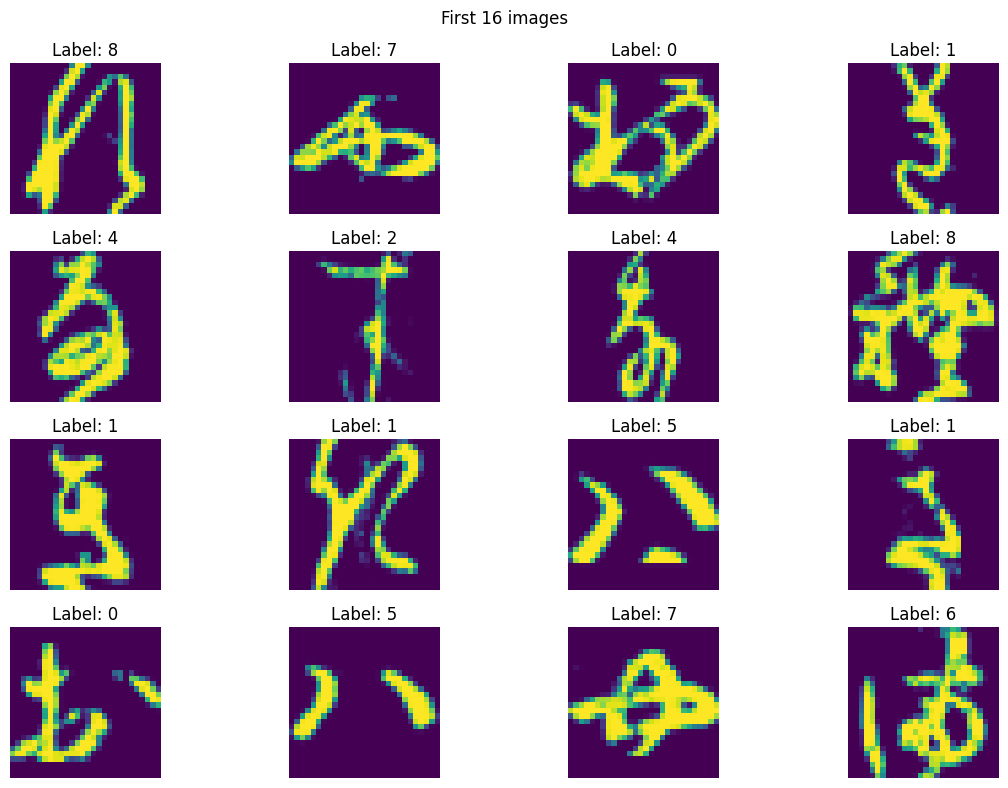

In [ ]:
fig,axes = plt.subplots(4,4,figsize=(12,8))
plt.suptitle("First 16 images")

for i, ax in enumerate(axes.flat):
  img,label = train_data[i]
  ax.imshow(img.squeeze())
  ax.set_title(f"Label: {label}")
  ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
#connecting with gpu
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"device: {device}")

device: cpu


In [ ]:
#createin Neural Network
class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    x = x.view(x.size(0), -1) # Flatten the input tensor
    return self.model(x)

In [ ]:
#apply the class
model = NN()
model = model.to(device)

#loss function
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
#training loop
epochs = 20
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_feature, batch_label in train_dataloader:
    batch_feature = batch_feature.to(device)
    batch_label = batch_label.to(device)
    #forward pass
    outputs = model(batch_feature)

    #calculate loss
    loss = loss_fn(outputs,batch_label)

    #Backward
    optimizer.zero_grad()
    loss.backward()

    #update gradients
    optimizer.step()
  total_epoch_loss += loss.item()
  avg = total_epoch_loss/len(train_dataloader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {avg:.4f}")

Epoch 1/20, Loss: 0.0012
Epoch 2/20, Loss: 0.0014
Epoch 3/20, Loss: 0.0005
Epoch 4/20, Loss: 0.0005
Epoch 5/20, Loss: 0.0005
Epoch 6/20, Loss: 0.0004
Epoch 7/20, Loss: 0.0004
Epoch 8/20, Loss: 0.0003
Epoch 9/20, Loss: 0.0006
Epoch 10/20, Loss: 0.0002
Epoch 11/20, Loss: 0.0005
Epoch 12/20, Loss: 0.0002
Epoch 13/20, Loss: 0.0004
Epoch 14/20, Loss: 0.0003
Epoch 15/20, Loss: 0.0002
Epoch 16/20, Loss: 0.0003
Epoch 17/20, Loss: 0.0001
Epoch 18/20, Loss: 0.0002
Epoch 19/20, Loss: 0.0003
Epoch 20/20, Loss: 0.0000


In [ ]:
model.eval()

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#evaluation using test_data
total = 0
correct = 0
with torch.no_grad():
  for batch_feature, batch_label in test_dataloader:
    batch_feature = batch_feature.to(device)
    batch_label = batch_label.to(device)
    outputs = model(batch_feature)
    _,predicted = torch.max(outputs,1)
    total += batch_label.size(0)
    correct += (predicted == batch_label).sum().item()
    accuracy = correct/total
print(f"correct: {correct}")
print(f"total: {total}")
print(f"Accuracy: {accuracy*100:.2f}%")

correct: 56550
total: 60000
Accuracy: 94.25%


In [ ]:
classes =
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")